---
title: cheg304 hw6 q1
author: author
date: today
format:
    html:
        self-contained: true
        code-fold: true
---

# (a)

for $n=4$, we get $(10 \pm 0.075)$. since $n$ is pretty small, we need to **assume the underlying distribution is normal** to continue this analysis. once we do that, we know that the sampling distribution of a normally distributed random variable is as follows

$$
\mu_{\bar{x}} = \mu \hspace{3em} \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

now we can find our z value for the range and calculate the probability from there. also if just calculate one side then we can use symmetry

$$
z_{\text{left}} = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} =  \frac{-0.075}{0.10 / \sqrt{4}} = -1.5
$$

now we use table or like any software to find (where $f(x)$ is the z distribution)

$$
\int_{-\infty}^{-1.5} f(x) \ dx 
$$

In [17]:
from scipy.stats import norm

integral = norm.cdf(-1.5)
print(f'p: {2*integral:.3f}')

p: 0.134


# (b)

this is the same setup as before, but we need to calculate $z_{\text{left}}$ and $z_{\text{right}}$ and add their probabilities

$$
z_{\text{right}} = \frac{\bar{x}_{\text{right}} - \mu}{\sigma / \sqrt{n}} =  \frac{10.075 - 10.10}{0.10 / \sqrt{4}} = -0.5
$$

$$
z_{\text{left}} = \frac{\bar{x}_{\text{left}} - \mu}{\sigma / \sqrt{n}} =  \frac{9.925 - 10.10}{0.10 / \sqrt{4}} = -3.5
$$

the probability can then be calculated easily noting that 

$$
\int_{-\infty}^{-0.5} f(x) \ dx = \int_{0.5}^{\infty} f(x) \ dx
$$

which makes the left 

$$
\int_{-\infty}^{-3.5} f(x) \ dx 
$$

and the right

$$
\int_{0.5}^{\infty} f(x) \ dx  = 1 - \int_{-\infty}^{-0.5} f(x) \ dx
$$


In [ ]:
right = 1 - norm.cdf(-0.5)
left = norm.cdf(-3.5)
print(f'probability: {right+left:.3f}')

probability: 0.692


now just making a quick visualization to compare (a) and (b)

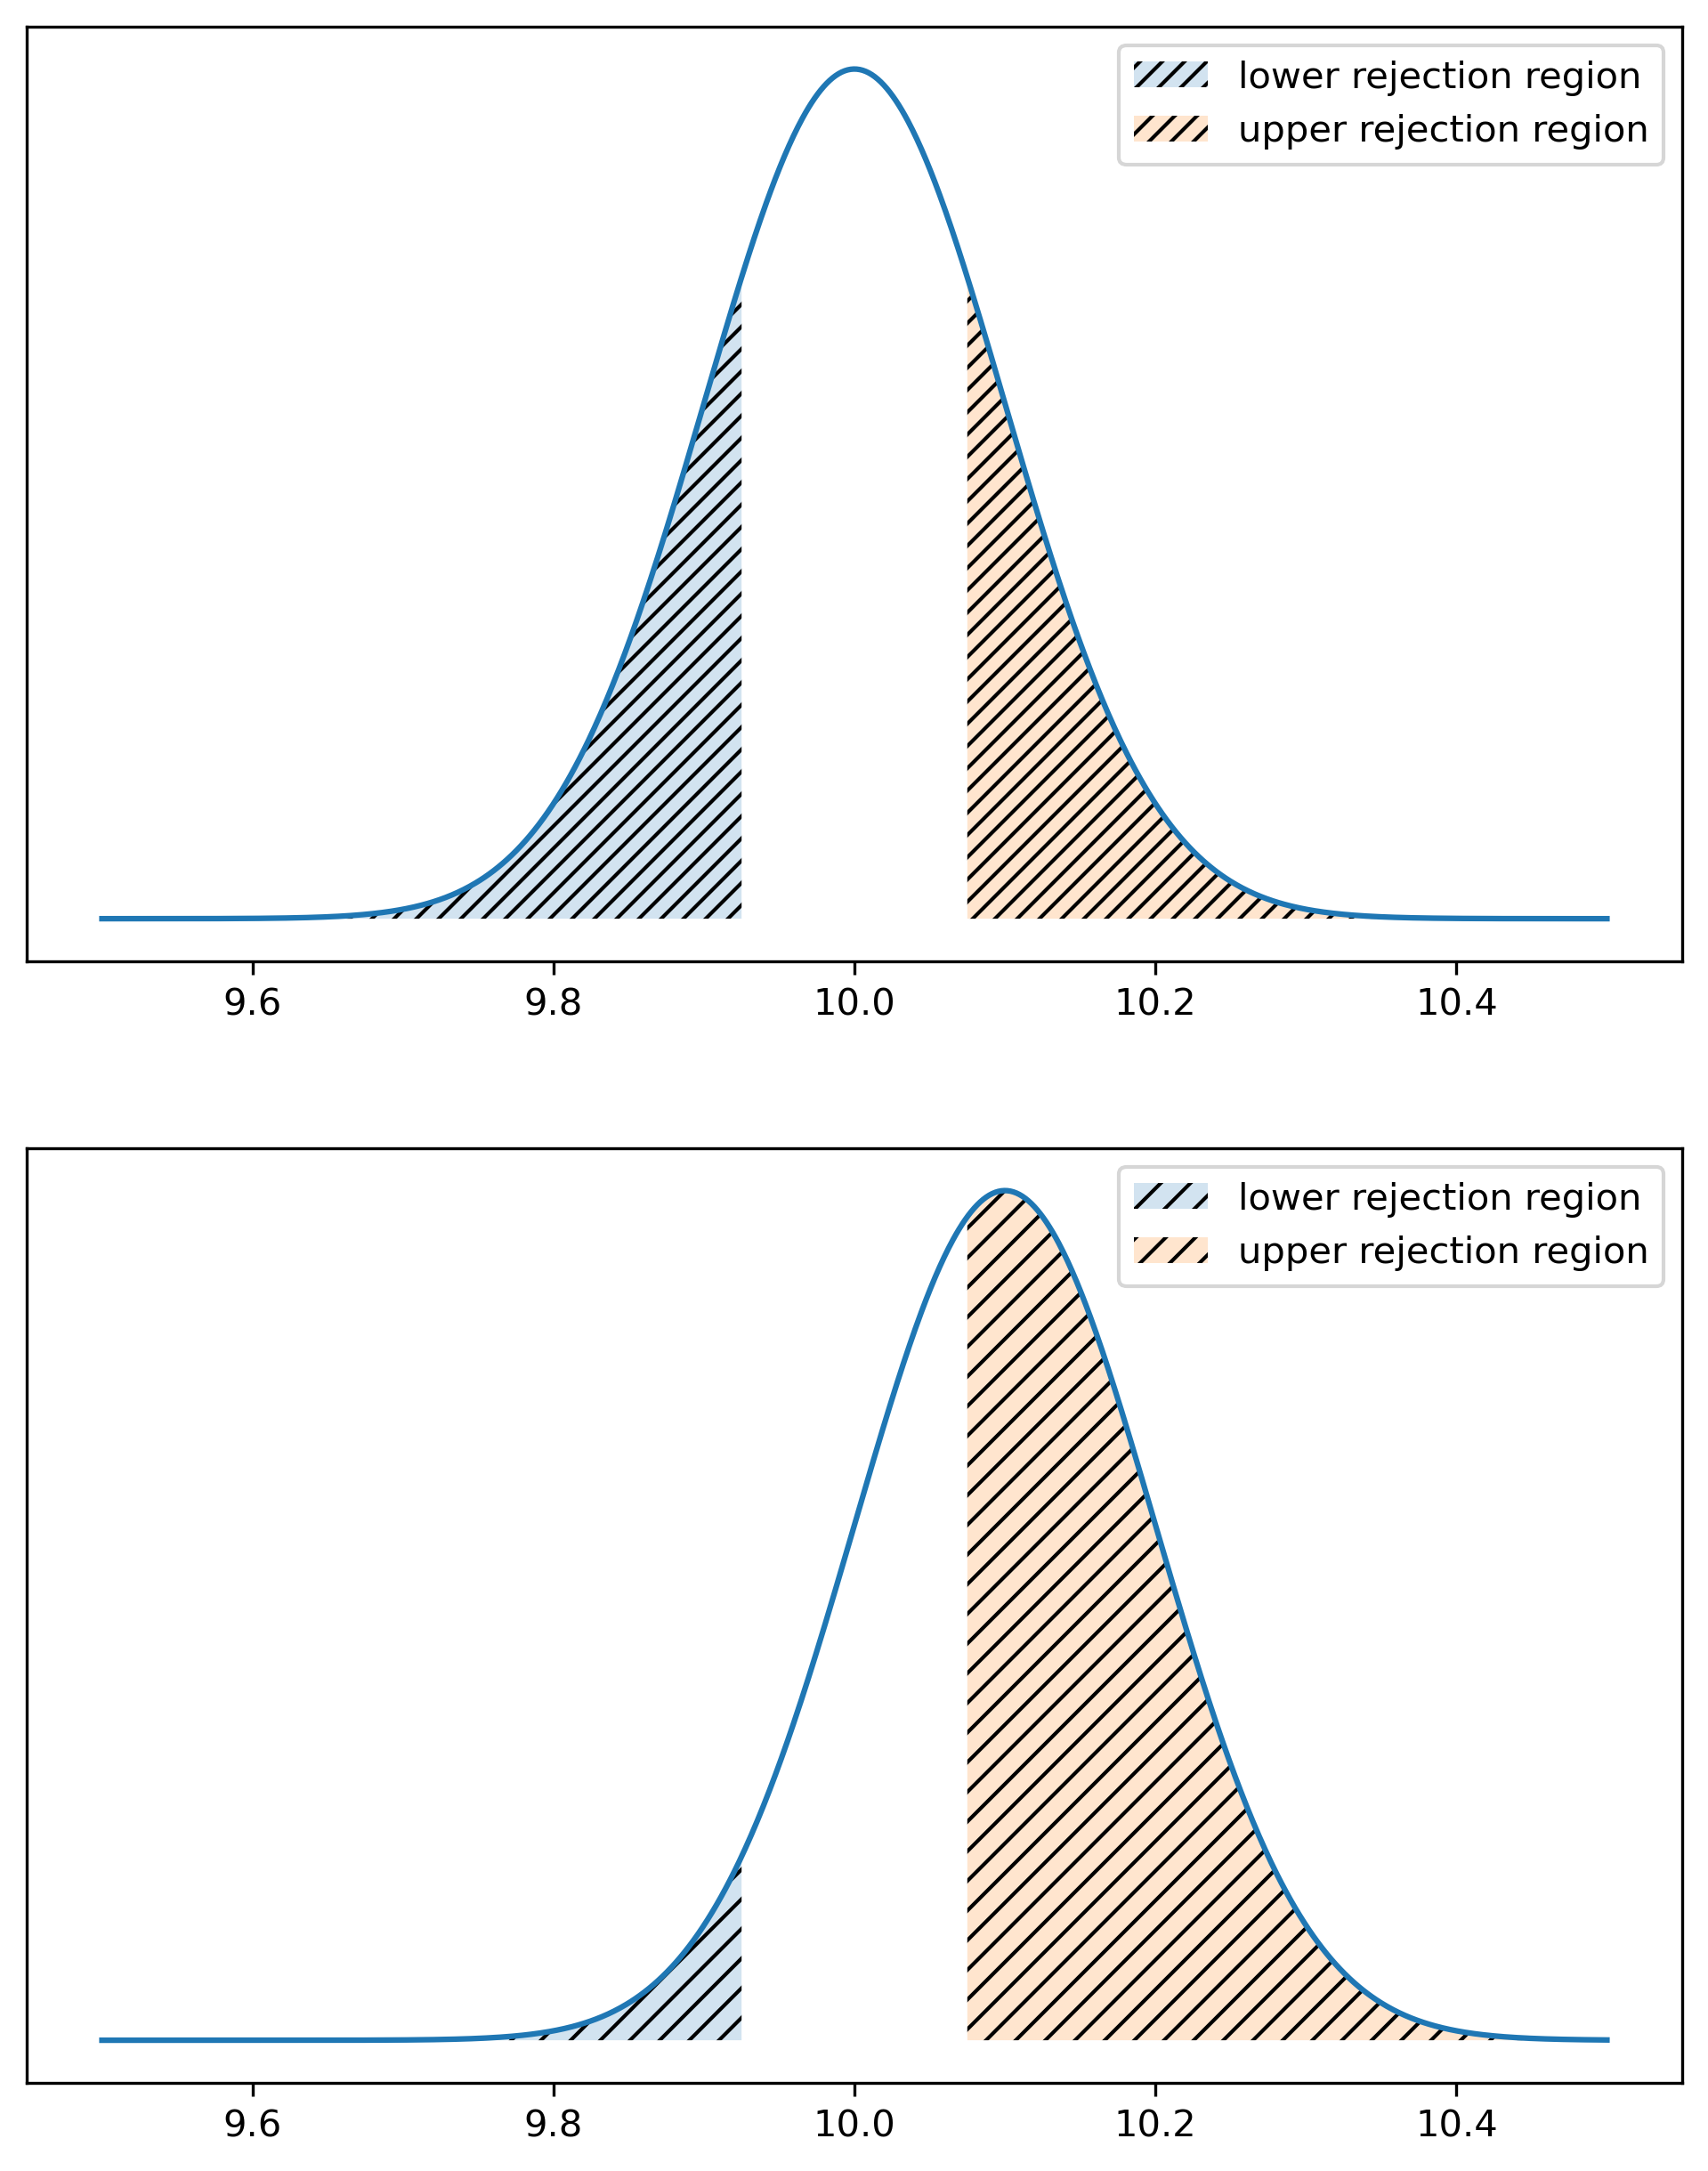

In [26]:
import numpy as np
import matplotlib.pyplot as plt

fig, (a,b) = plt.subplots(2,1,dpi=300, figsize=(8,10))

mean = 10
std = 0.10
n = 4

low = mean-5*std
high = mean+5*std

x = np.linspace(low, high, 1000)
ya = norm.pdf(x, mean, std)

x_fill_left = np.linspace(low, mean - 3 * std / n, 1000)
y_fill_left = norm.pdf(x_fill_left, mean, std)

x_fill_right = np.linspace(mean + 3 * std / n, high, 1000)
y_fill_right = norm.pdf(x_fill_right, mean, std)


a.plot(x,ya, label='_nolegend_')
a.fill_between(x_fill_left, y_fill_left, alpha=0.2, hatch='////')
a.fill_between(x_fill_right, y_fill_right, alpha=0.2, hatch='////')

a.legend(['lower rejection region', 'upper rejection region'])

a.set_yticks([])

actual_mean = 10.1

x = np.linspace(low, high, 1000)
yb = norm.pdf(x, actual_mean, std)

x_fill_left = np.linspace(low, mean - 3 * std / n, 1000)
y_fill_left = norm.pdf(x_fill_left, actual_mean, std)

x_fill_right = np.linspace(mean + 3 * std / n, high, 1000)
y_fill_right = norm.pdf(x_fill_right, actual_mean, std)


b.plot(x,yb, label='_nolegend_')
b.fill_between(x_fill_left, y_fill_left, alpha=0.2, hatch='///')
b.fill_between(x_fill_right, y_fill_right, alpha=0.2, hatch='///')
b.set_yticks([])


plt.legend(['lower rejection region', 'upper rejection region'])

In [21]:
# filler text